In [1]:
import pandas as pd

ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [2]:
movies = pd.read_csv("ml-latest-small/movies.csv")

list_movie = []
for i in movies["genres"].unique():
    j = i.split("|")
    for k in j:
        if k not in list_movie:
            list_movie.append(k)

print("lenght: ", len(list_movie))
for item in list_movie:
    print(item)

lenght:  20
Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
War
Musical
Documentary
IMAX
Western
Film-Noir
(no genres listed)


In [3]:
ratings = pd.merge(ratings, movies, on='movieId')

(no genres listed) 0
IMAX 1
Documentary 2
Horror 4
Film-Noir 4
Animation 6
War 7
Children 10
Western 10
Sci-Fi 12
Musical 16
Fantasy 19
Mystery 23
Action 25
Crime 27
Adventure 29
Thriller 38
Romance 58
Comedy 104
Drama 120


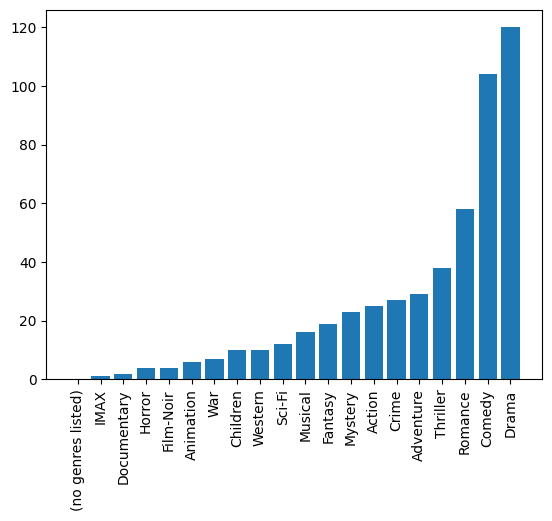

In [12]:
# print all ratings by user in order of rating
utente = 4
c = ratings[ratings["userId"] == utente].sort_values("rating", ascending=False)
# count all different genres that appear in the movies rated by user 1, and sort them by count
# keep the genres in a csv file
dict = {
    "Adventure": 0,
    "Animation": 0,
    "Children": 0,
    "Comedy": 0,
    'Fantasy': 0,
    'Romance': 0,
    'Drama': 0,
    'Action': 0,
    'Crime': 0,
    'Thriller': 0,
    'Horror': 0,
    'Mystery': 0,
    'Sci-Fi': 0,
    'War': 0,
    'Musical': 0,
    'Documentary': 0,
    'IMAX': 0,
    'Western': 0,
    'Film-Noir': 0,
    '(no genres listed)': 0,
}

# weight the genres by the rating
for index, row in c.iterrows():
    genres = row["genres"].split("|")
    for genre in genres:
        # dict[genre] += row["rating"]
        dict[genre] += 1

# order the dict by value
ordered_dict = {}

for key, value in sorted(dict.items(), key=lambda x: x[1], reverse=False):
    print(key, value)
    ordered_dict[key] = value

# barplot of the values in the dict in order of value
import matplotlib.pyplot as plt
import operator
plt.bar(range(len(dict)), ordered_dict.values(), align='center')
plt.xticks(range(len(dict)), ordered_dict.keys(), rotation='vertical')
plt.show()


# c = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)
# df = pd.DataFrame(c)
# c.to_csv("user1.csv", index=False)

   movieId                                       genres
0        1  Adventure|Animation|Children|Comedy|Fantasy


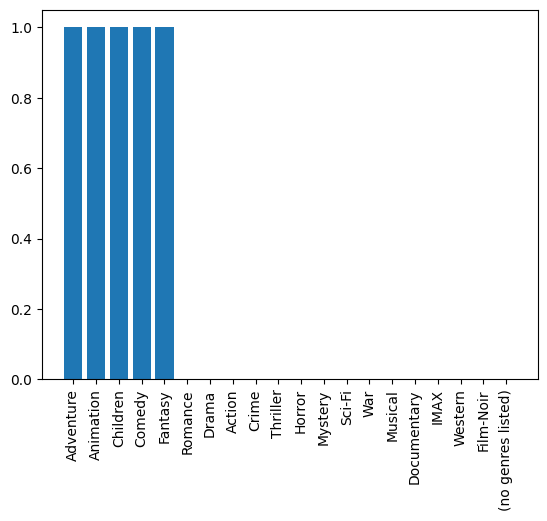

In [17]:
# for each movie, print out its genres

film = 1
d = movies[["movieId", "genres"]]
d = d[d["movieId"] == film]
print(d)

# barplot of the genres, 0 if the movie does not have the genre, 1 if it has it
dict = {
    "Adventure": 0,
    "Animation": 0,
    "Children": 0,
    "Comedy": 0,
    'Fantasy': 0,
    'Romance': 0,
    'Drama': 0,
    'Action': 0,
    'Crime': 0,
    'Thriller': 0,
    'Horror': 0,
    'Mystery': 0,
    'Sci-Fi': 0,
    'War': 0,
    'Musical': 0,
    'Documentary': 0,
    'IMAX': 0,
    'Western': 0,
    'Film-Noir': 0,
    '(no genres listed)': 0,
}

for index, row in d.iterrows():
    genres = row["genres"].split("|")
    for genre in genres:
        dict[genre] = 1

plt.bar(range(len(dict)), dict.values(), align='center')
plt.xticks(range(len(dict)), dict.keys(), rotation='vertical')
plt.show()
